In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scikit_posthocs import posthoc_nemenyi_friedman

DOWNSAMPLING_COLORS = {
    'Decimate': '#56B4E9', # Light blue
    'M4': '#D55E00', # Vermilion
    'MinMax': '#009E73', # Bluish green 
    'LTTB': '#CC79A7', # Reddish purple``
    'MinMaxLTTB': '#E69F00', # Orange
    'Original': 'Black'
}

data_dir = '../results'
feature_dir = '../results/features'
classifier_dir = f'../results/classification'

In [5]:
metrics = pd.read_csv(f'{feature_dir}/metrics.csv')
metrics

,downsampler,factor,exec_time
0,Original,1,15907.036
1,Decimate,2,5148.807
2,Decimate,5,1344.752
3,Decimate,10,623.319
4,Decimate,15,463.524
...,...,...,...
126,MinMaxLTTB,200,72.963
127,MinMaxLTTB,300,62.662
128,MinMaxLTTB,400,59.640
129,MinMaxLTTB,500,58.973


In [6]:
class_metrics = pd.read_csv(f'{classifier_dir}/metrics_raw.csv')
class_metrics

,downsampler,factor,fold,accuracy,f1,precision,recall,roc_auc_ovr,roc_auc_ovo,sensitivity_class_0,specificity_class_0,sensitivity_class_1,specificity_class_1,sensitivity_class_2,specificity_class_2
0,Original,1,1,0.907563,0.891296,0.919520,0.870270,0.981637,0.982400,0.836735,0.978836,0.977778,0.844660,0.796296,0.989130
1,Original,1,2,0.898734,0.882574,0.901362,0.868610,0.983381,0.986077,0.714286,0.968085,0.948148,0.843137,0.943396,0.989130
2,Original,1,3,0.907173,0.893089,0.919582,0.873322,0.987222,0.988329,0.857143,0.978723,0.970370,0.843137,0.792453,0.989130
3,Original,1,4,0.945148,0.940476,0.946579,0.934773,0.988119,0.989204,0.897959,0.984043,0.962963,0.921569,0.943396,0.989130
4,Original,1,5,0.932489,0.926134,0.943344,0.911571,0.986300,0.987715,0.877551,0.984043,0.970370,0.882353,0.886792,0.994565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,MinMaxLTTB,1000,6,0.734177,0.667801,0.763795,0.645735,0.878342,0.889507,0.693878,0.941489,0.903704,0.529412,0.339623,0.978261
1306,MinMaxLTTB,1000,7,0.721519,0.636441,0.730519,0.615741,0.879807,0.892295,0.625000,0.947090,0.925926,0.509804,0.296296,0.967213
1307,MinMaxLTTB,1000,8,0.696203,0.640031,0.665904,0.639660,0.861575,0.878337,0.770833,0.915344,0.814815,0.578431,0.333333,0.928962
1308,MinMaxLTTB,1000,9,0.725738,0.668515,0.738950,0.640432,0.852655,0.868385,0.625000,0.952381,0.888889,0.529412,0.407407,0.956284


In [7]:
agg_df = metrics.groupby(["factor", "downsampler"])["exec_time"].agg(["mean"]).reset_index()
agg_df

,factor,downsampler,mean
0,1,Original,15907.036
1,2,Decimate,5148.807
2,2,LTTB,5112.618
3,2,M4,5171.893
4,2,MinMax,5125.189
...,...,...,...
126,1000,Decimate,51.890
127,1000,LTTB,52.541
128,1000,M4,53.483
129,1000,MinMax,52.936


In [8]:
class_agg_df = class_metrics.groupby(["factor", "downsampler"])["accuracy"].agg(["mean", "std"]).reset_index()
class_agg_df

,factor,downsampler,mean,std
0,1,Original,0.919870,0.025683
1,2,Decimate,0.924086,0.014041
2,2,LTTB,0.924088,0.018525
3,2,M4,0.920709,0.021124
4,2,MinMax,0.924928,0.020643
...,...,...,...,...
126,1000,Decimate,0.729224,0.031974
127,1000,LTTB,0.721655,0.027380
128,1000,M4,0.708132,0.019385
129,1000,MinMax,0.751597,0.017999


In [9]:
merged_df = pd.merge(agg_df, class_agg_df, on=['factor', 'downsampler'], suffixes=('_time', '_acc'))
merged_df

,factor,downsampler,mean_time,mean_acc,std
0,1,Original,15907.036,0.919870,0.025683
1,2,Decimate,5148.807,0.924086,0.014041
2,2,LTTB,5112.618,0.924088,0.018525
3,2,M4,5171.893,0.920709,0.021124
4,2,MinMax,5125.189,0.924928,0.020643
...,...,...,...,...,...
126,1000,Decimate,51.890,0.729224,0.031974
127,1000,LTTB,52.541,0.721655,0.027380
128,1000,M4,53.483,0.708132,0.019385
129,1000,MinMax,52.936,0.751597,0.017999


In [10]:
original_time = merged_df[(merged_df['downsampler'] == 'Original')]['mean_time'].values[0]
original_times = np.full(merged_df.shape[0], original_time)

merged_df['speedup'] =  original_time / merged_df['mean_time']

merged_df

,factor,downsampler,mean_time,mean_acc,std,speedup
0,1,Original,15907.036,0.919870,0.025683,1.000000
1,2,Decimate,5148.807,0.924086,0.014041,3.089461
2,2,LTTB,5112.618,0.924088,0.018525,3.111329
3,2,M4,5171.893,0.920709,0.021124,3.075670
4,2,MinMax,5125.189,0.924928,0.020643,3.103697
...,...,...,...,...,...,...
126,1000,Decimate,51.890,0.729224,0.031974,306.553016
127,1000,LTTB,52.541,0.721655,0.027380,302.754725
128,1000,M4,53.483,0.708132,0.019385,297.422284
129,1000,MinMax,52.936,0.751597,0.017999,300.495617


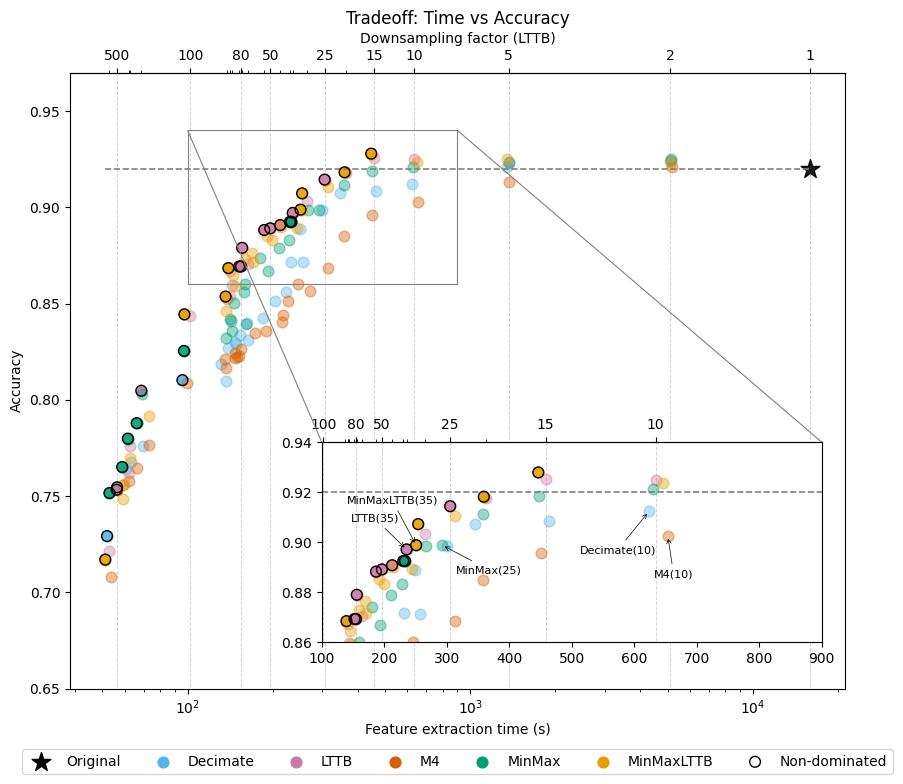

In [11]:
def test_significant_difference(metrics, tested_method, tested_factor, reference_method, reference_factor, alpha=0.05):
    tested_acc = metrics[(metrics['downsampler'] == tested_method) & (metrics['factor'] == tested_factor)]['accuracy']
    reference_acc = metrics[(metrics['downsampler'] == reference_method) & (metrics['factor'] == reference_factor)]['accuracy']

    test_data = pd.DataFrame({
        f'{tested_method}({tested_factor})': tested_acc.values,
        f'{reference_method}({reference_factor})': reference_acc.values
    })
    
    nemenyi_result = posthoc_nemenyi_friedman(test_data)
    p_val = nemenyi_result.iloc[0, 1]
    
    if p_val < alpha:
        return True, p_val, tested_acc.mean()
    else:
        return False, p_val, tested_acc.mean()


def find_first_significant_difference(metrics, tested_method, reference_method, reference_factor, alpha=0.05):
    factors = sorted(metrics[metrics['downsampler'] == tested_method]['factor'].unique())
    for factor in factors:
        diff, p_val, mean_acc = test_significant_difference(metrics, tested_method, factor, reference_method, reference_factor, alpha)
        if diff:
            return factor, p_val, mean_acc
    return None, None, None


def find_first_significant_difference_each_method(metrics, reference_method, reference_factor, alpha=0.05):
    significance_points = {}
    for method in metrics['downsampler'].unique():
        if method == reference_method:
            continue
        factor, p_val, mean_acc = find_first_significant_difference(metrics, method, reference_method, reference_factor, alpha)
        significance_points[method] = (factor, p_val, mean_acc)
    return significance_points


def get_critical_factors():
    metrics = pd.read_csv(f'{classifier_dir}/metrics_raw.csv')
    critical_factors = find_first_significant_difference_each_method(metrics, reference_method='Original', reference_factor=1, alpha=0.05)
    return critical_factors


def get_pareto_front(df):
    sorted_df = df.sort_values(["mean_time", "mean_acc"], ascending=[True, False])
    
    pareto = []
    best_acc = -np.inf
    for _, row in sorted_df.iterrows():
        if row["mean_acc"] > best_acc:
            pareto.append(row)
            best_acc = row["mean_acc"]
    return pd.DataFrame(pareto)


def add_factor_axis(ax, merged_df, reference_method="LTTB", factors_to_show=None, set_label=True):
    ref_data = merged_df[merged_df["downsampler"] == reference_method]
    ref_data = ref_data.sort_values("factor")

    if factors_to_show is None:
        factors_to_show = [1, 2, 5, 10, 15, 25, 50, 80, 100, 500]

    factor_to_time = dict(zip(ref_data["factor"], ref_data["mean_time"]))
    times_sel = [factor_to_time[f] for f in factors_to_show if f in factor_to_time]

    original_data = merged_df[merged_df["downsampler"] == "Original"]
    times_sel.insert(0, original_data["mean_time"].values[0])
    factor_to_time[1] = original_data["mean_time"].values[0]

    all_factors = sorted(ref_data["factor"].unique())
    all_times = [factor_to_time[f] for f in all_factors if f in factor_to_time]
    all_times.insert(0, original_data["mean_time"].values[0])

    top_ax = ax.secondary_xaxis("top")
    top_ax.minorticks_off()

    for t in times_sel:
        ax.plot([t, t], (0.5, 1), color='lightgray', linestyle='--', linewidth=0.7, zorder=0)

    top_ax.set_xticks(times_sel)
    top_ax.set_xticklabels([str(f) for f in factors_to_show if f in factor_to_time])
    
    minor_times = [t for t in all_times if t not in times_sel]
    top_ax.set_xticks(minor_times, minor=True, labels=[])

    if set_label == True:
        top_ax.set_xlabel(f"Downsampling factor ({reference_method})")

    return top_ax


def add_zoom_inset(ax, xlim, ylim, position, width, height, merged_df):
    critical_factors = get_critical_factors()
    axins = inset_axes(ax, width=width, height=height, bbox_to_anchor=position, bbox_transform=ax.transAxes, borderpad=0)
    add_factor_axis(axins, merged_df, set_label=False)
    axins.hlines(merged_df[merged_df['downsampler'] == 'Original']['mean_acc'], xlim[0], xlim[1], linestyles='--', linewidth=1.2, color="grey")

    rows = []
    for downsampler, (factor, _, _) in critical_factors.items():
        time = merged_df[(merged_df['downsampler'] == downsampler) & (merged_df['factor'] == factor)]['mean_time'].values[0]
        acc = merged_df[(merged_df['downsampler'] == downsampler) & (merged_df['factor'] == factor)]['mean_acc'].values[0]

        rows.append([downsampler, time, acc])        
    critical_factor_df = pd.DataFrame(rows, columns=['downsampler', 'mean_time', 'mean_acc'])


    all_data = [coll.get_offsets() for coll in ax.collections]
    zoomed_data = []
    for data in all_data:
        mask = (data[:, 0] >= xlim[0]) & (data[:, 0] <= xlim[1]) & (data[:, 1] >= ylim[0]) & (data[:, 1] <= ylim[1])
        zoomed_data.append(data[mask])
    zoomed_data_df = pd.DataFrame(np.vstack(zoomed_data), columns=['mean_time', 'mean_acc'])
    zoomed_data_df.drop_duplicates(inplace=True)

    zoom_pareto = get_pareto_front(zoomed_data_df)
    pareto_indices = set(zoom_pareto.index)
    pareto_mask = zoomed_data_df.index.isin(pareto_indices)
    pareto_data = zoomed_data_df[pareto_mask]

    axins.set_xlim(*xlim)
    axins.set_ylim(*ylim)

    for coll in ax.collections:
        offsets = coll.get_offsets()
        if len(offsets) == 0:
            continue
        if offsets[0][0] != 0:
            axins.scatter(offsets[:, 0], offsets[:, 1],
                        color=coll.get_facecolor(),
                        s=coll.get_sizes(),
                        alpha=coll.get_alpha(),
                        marker=coll.get_paths()[0] if coll.get_paths() else 'o',
                        zorder=coll.get_zorder())

    axins.scatter(pareto_data["mean_time"], pareto_data["mean_acc"], facecolors='none', edgecolors='black', s=60, linewidths=1, zorder=3)

    positions = {
        "Decimate": [-50, -30],
        "LTTB": [-40, 20],
        "MinMax": [10, -20],
        "MinMaxLTTB": [-50, 30],
        "M4": [-10, -30]
    }
    for _, row in critical_factor_df.iterrows():
        axins.annotate(f"{row['downsampler']}({critical_factors[row['downsampler']][0]})",
                       xy=(row['mean_time'], row['mean_acc']),
                       xytext=positions[row['downsampler']],
                       textcoords='offset points',
                       fontsize=8,
                       arrowprops=dict(arrowstyle="->", lw=0.5))

    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5", lw=0.8)

    return axins

def plot_time_acc(merged_df):
    fig, ax = plt.subplots(figsize=(10, 8))

    f_min = merged_df['mean_time'].min()
    f_max = merged_df['mean_time'].max()
    ax.hlines(merged_df[merged_df['downsampler'] == 'Original']['mean_acc'], f_min, f_max, linestyles='--', linewidth=1.2, color="grey")

    pareto_df = get_pareto_front(merged_df)
    pareto_indices = set(pareto_df.index)

    for downsampler in merged_df["downsampler"].unique():
        data = merged_df[merged_df['downsampler'] == downsampler]
        
        if downsampler == "Original":
            ax.scatter(data["mean_time"], data["mean_acc"], 
                       color=DOWNSAMPLING_COLORS[downsampler],
                       marker="*", s=200, alpha=0.9, 
                       label="Original")
        else:

            pareto_mask = data.index.isin(pareto_indices)
            pareto_data = data[pareto_mask]
            non_pareto_data = data[~pareto_mask]

            ax.scatter(pareto_data["mean_time"], pareto_data["mean_acc"], color=DOWNSAMPLING_COLORS[downsampler], s=60, alpha=0.9)

            ax.scatter(non_pareto_data["mean_time"], non_pareto_data["mean_acc"], color=DOWNSAMPLING_COLORS[downsampler], s=60, alpha=0.4, label=downsampler)

    ax.scatter(pareto_df["mean_time"], pareto_df["mean_acc"], facecolors='none', edgecolors='black', s=60, linewidths=1, label="Non-dominated", zorder=3)
    ax.set_ylim(0.65, 0.97)
    ax.set_xlabel("Feature extraction time (s)")
    ax.set_ylabel("Accuracy")
    ax.set_xscale('log')
    ax.set_title("Tradeoff: Time vs Accuracy")
    leg = ax.legend(bbox_to_anchor=(0.5, -0.15), loc="lower center", ncol=7)
    [handle.set_alpha(1) for handle in leg.legend_handles]
    add_factor_axis(ax, merged_df)
    add_zoom_inset(ax, xlim=(100, 900), ylim=(0.86, 0.94), position=(0.62, 0.05, 0.35, 0.35), width=5, height=2, merged_df=merged_df)

plot_time_acc(merged_df)